In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import pearsonr

In [58]:
df = pd.read_csv('data/metric_means.csv', index_col=0)
df = df.dropna()
print(df.describe())

          n_geese    n_frames  normalized_velocity_alignment  \
count  128.000000  128.000000                     128.000000   
mean    23.765625  497.492188                       0.996885   
std     16.041032  157.338644                       0.005367   
min      2.000000   33.000000                       0.956286   
25%     12.000000  422.500000                       0.996422   
50%     19.500000  496.000000                       0.998397   
75%     33.250000  604.750000                       0.999289   
max     70.000000  962.000000                       0.999939   

       normalized_velocity_alignment_std_dev  velocity_deviation  \
count                             128.000000          128.000000   
mean                                0.001684            1.048689   
std                                 0.003077            0.663583   
min                                 0.000026            0.152738   
25%                                 0.000403            0.626888   
50%            

In [59]:
def show_correlation(df: pd.DataFrame, feature_1: str, feature_2: str):
    
    fig = plt.figure(figsize=(7, 7))
    sns.regplot(df,
    x=feature_1,
    y=feature_2,
    )

    r, p = pearsonr(df[feature_1], df[feature_2])
    print(r, p)
    r, p = np.round((r, p), 3)
    plt.title(f"Regression plot: {feature_1} vs {feature_2} (r={r}, p={p})")

    plt.grid(color='lightgrey')
    plt.tight_layout()
    plt.show()
    

In [60]:
def show_correlations(df: pd.DataFrame, target_feature: str, features: list):
    """
    Show regression plots and correlation coefficients between one chosen feature
    and all other numeric features in the dataframe.
    """
    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Remove the target feature itself
    n_features = len(features)
    if n_features == 0:
        print("No other numeric columns to correlate with.")
        return

    # --- Determine subplot grid size dynamically ---
    n_cols = 2
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(7 * n_cols, 6 * n_rows))
    axes = axes.flatten()  # flatten for easy iteration

    # --- Loop through all features and plot ---
    for i, feature in enumerate(features):
        ax = axes[i]

        if feature != 'n_frames':
            # Draw error bars (Matplotlib)
            ax.errorbar(
                df[target_feature],
                df[feature],
                yerr=df[feature + '_std_dev'],
                fmt='o',
                markerfacecolor='steelblue',
                markeredgecolor='black',
                ecolor='black',
                elinewidth=1,
                alpha=0.8,
                capsize=3,
                label='Mean ± SD'
                )

        # draw points and regression plot
        sns.regplot(
            data=df,
            x=target_feature,
            y=feature,
            ax=ax,
            scatter_kws={"alpha": 0.8},
            line_kws={"color": "red", 'alpha': 0.8},
        )

        # Compute correlation
        r, p = pearsonr(df[target_feature], df[feature])
        r, p = np.round((r, p), 3)

        ax.set_title(f"{feature} vs {target_feature}\n(r={r}, p={p})")
        ax.grid(color="lightgrey")

        ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
        ax.tick_params(length=0)

    # Hide empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


In [61]:
features = [
    'n_frames',
    'normalized_velocity_alignment',
    'velocity_deviation',
    'longitudinal_acceleration_deviation',
    'sidewise_acceleration_deviation',
    'velocity_pca_first_component',
    'velocity_pca_second_component',
    ]

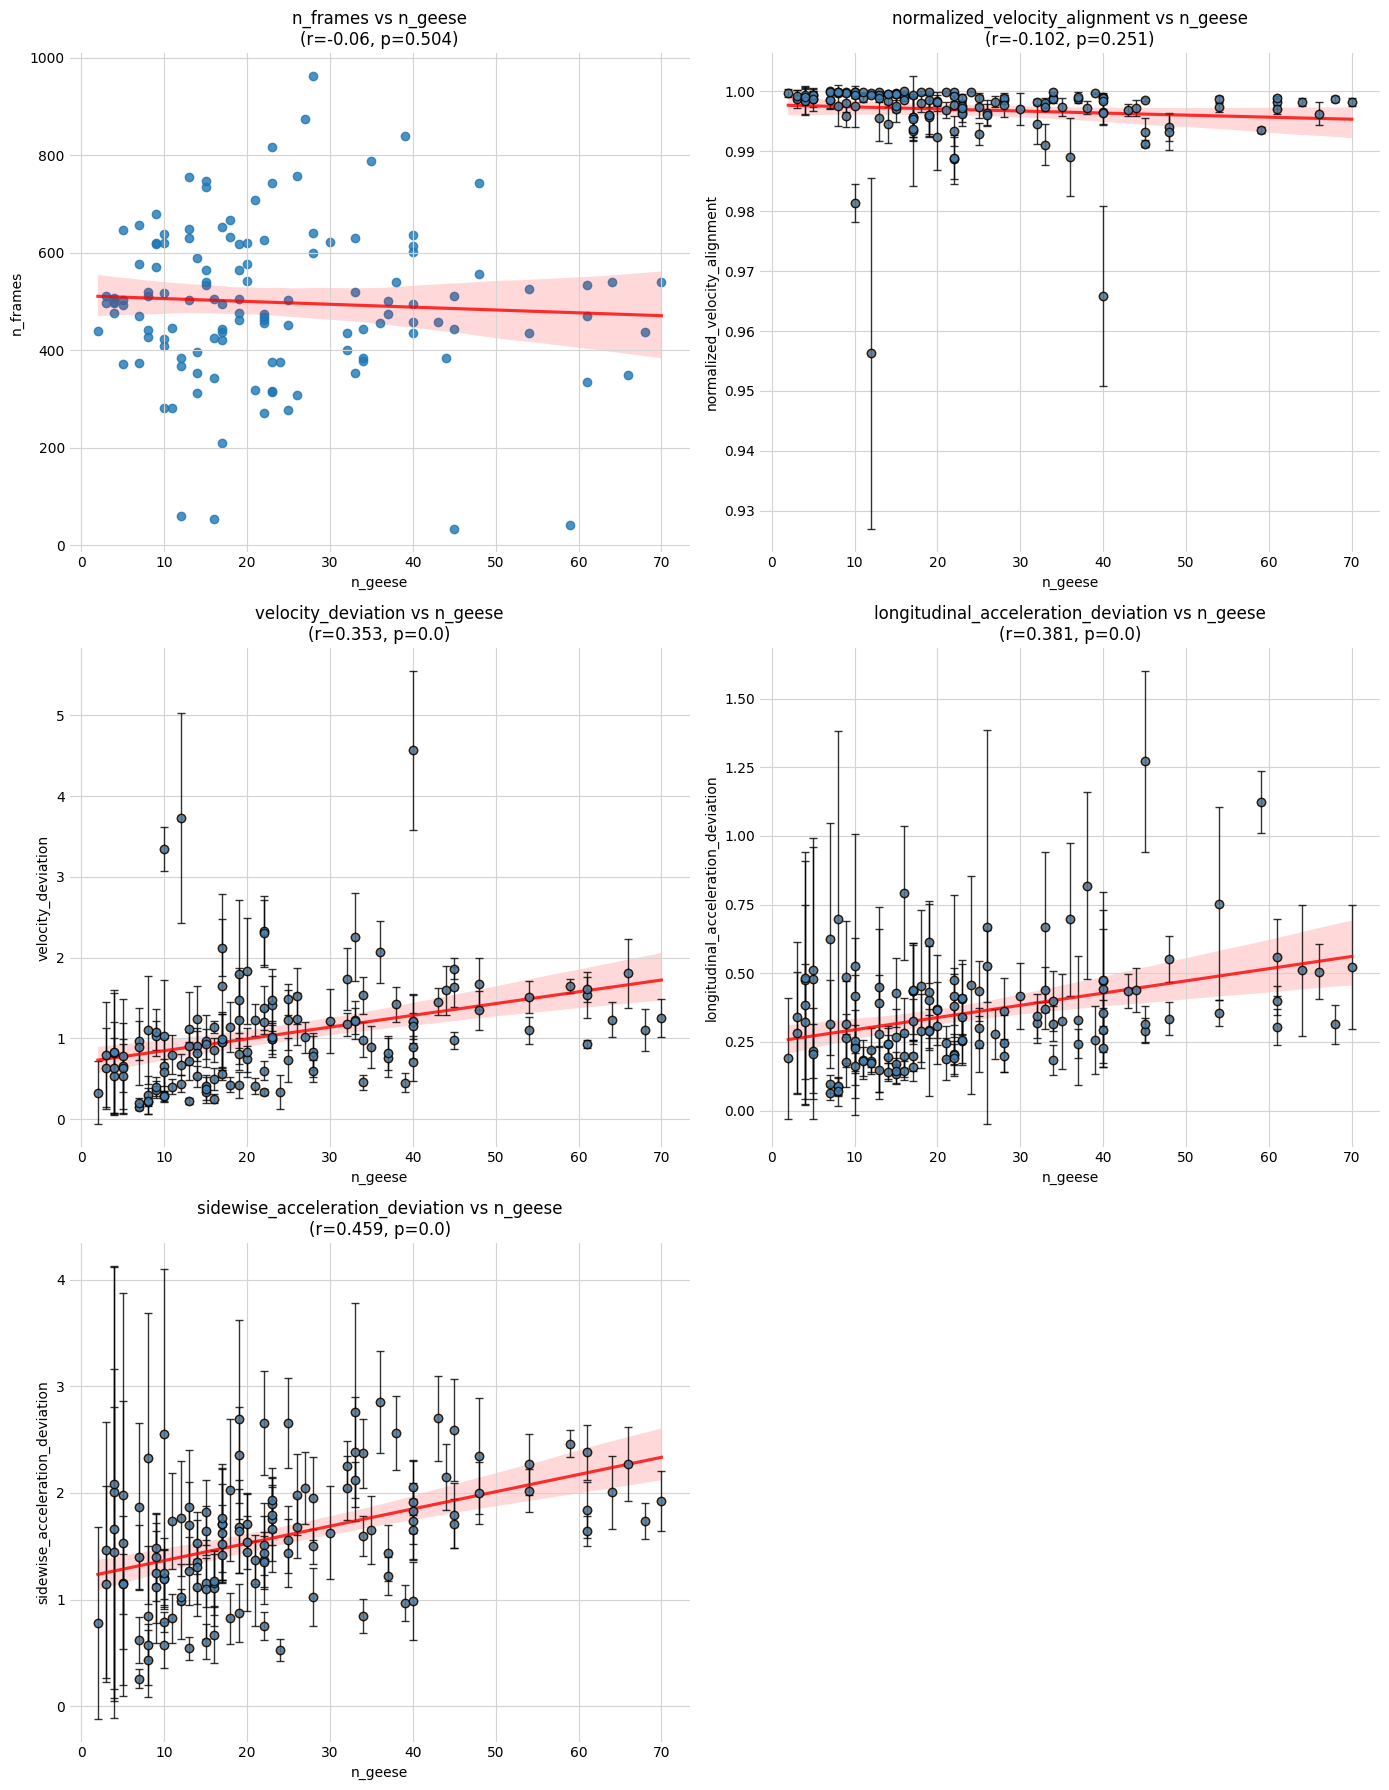

In [62]:
show_correlations(df, 'n_geese', features)

In [63]:
print(f'Dropping {len(df[df['n_frames'] <= 100])} data_points out of {len(df)}')
df = df[df['n_frames'] > 100]

Dropping 4 data_points out of 128


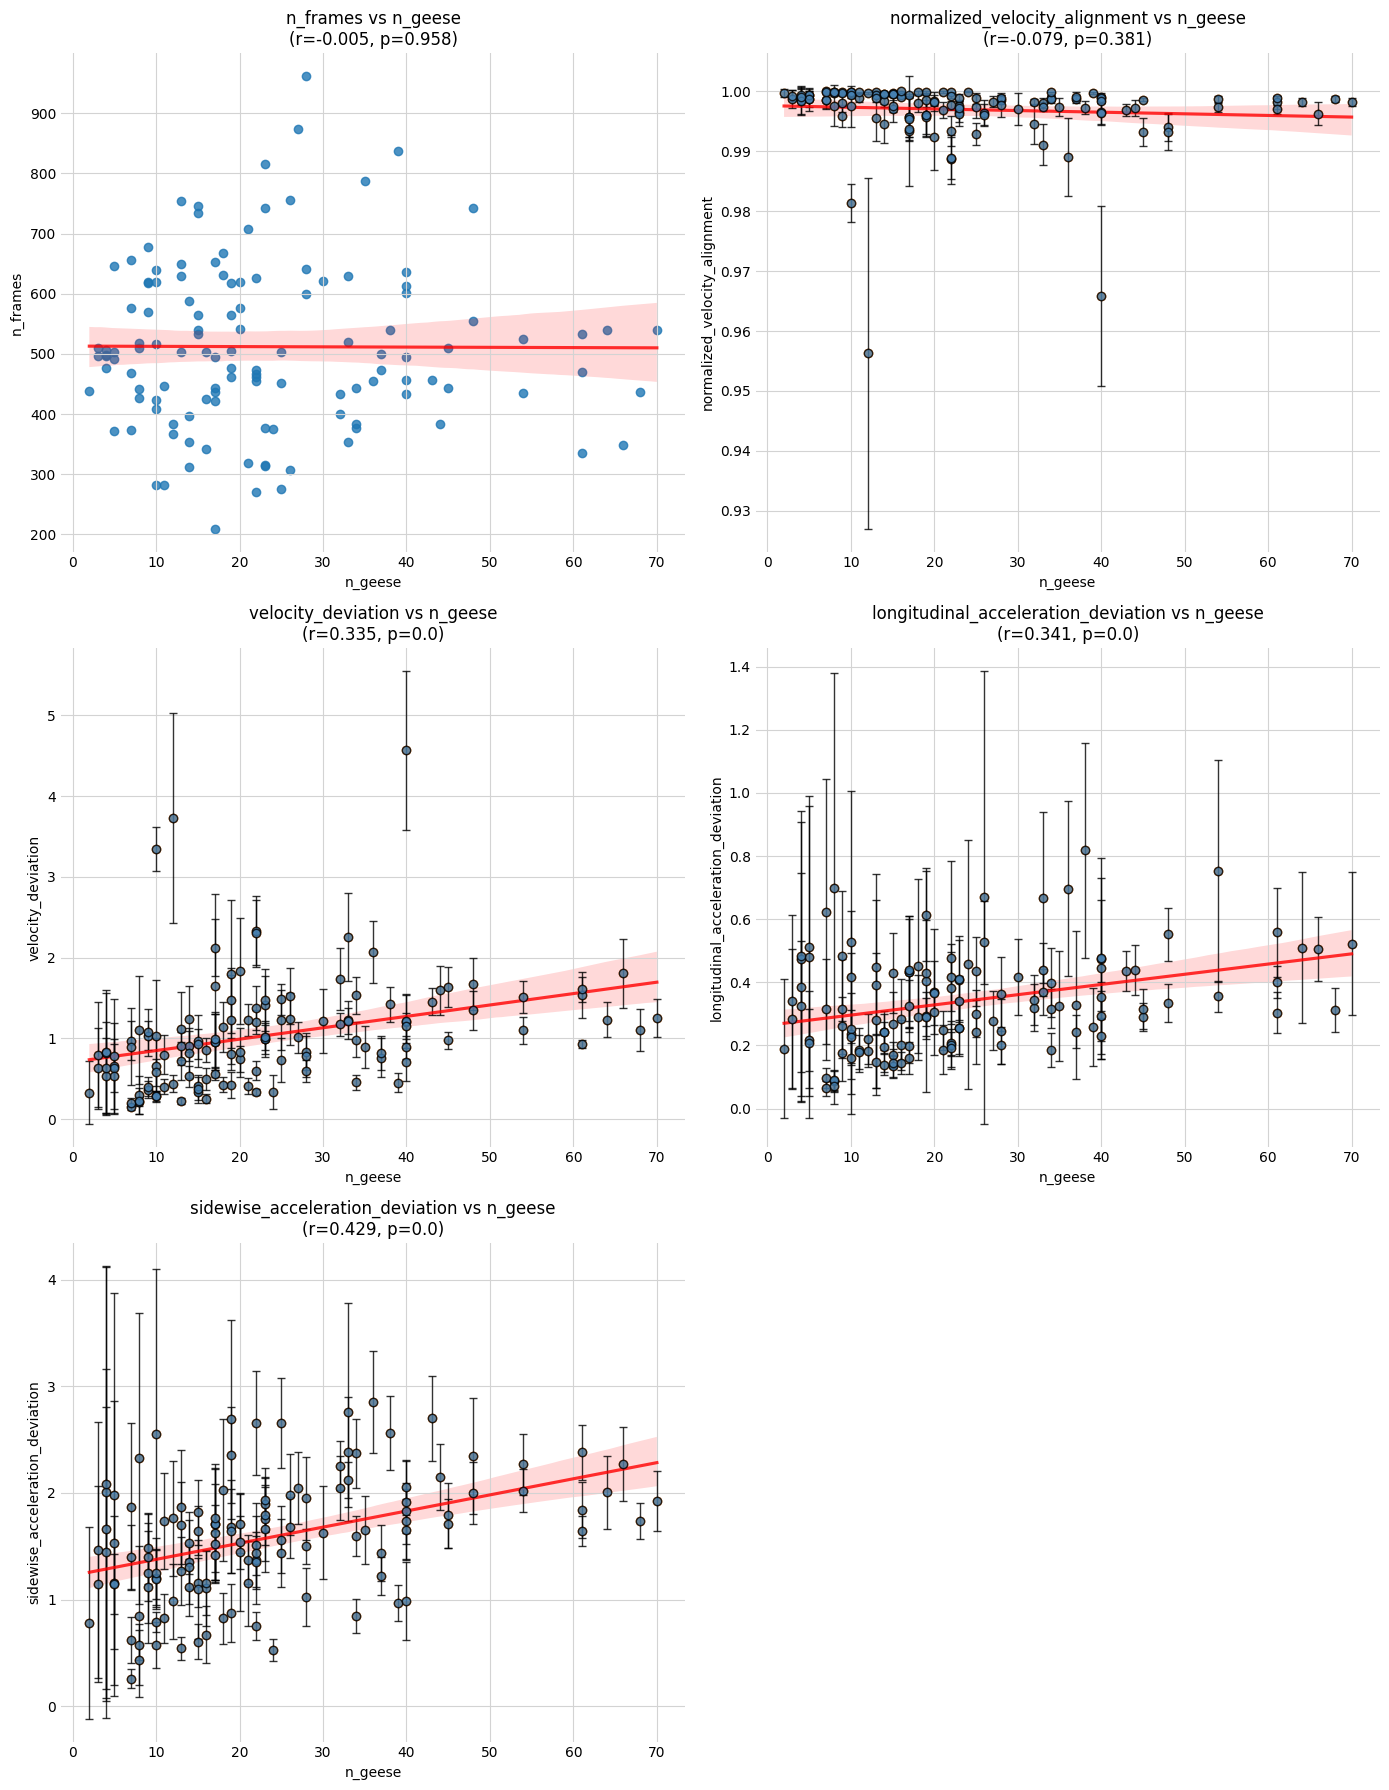

In [64]:
show_correlations(df, 'n_geese', features)

In [65]:
print(f'Dropping {len(df[df['normalized_velocity_alignment'] <= 0.985])} data_points out of {len(df)}')
df = df[df['normalized_velocity_alignment'] > 0.985]

Dropping 3 data_points out of 124


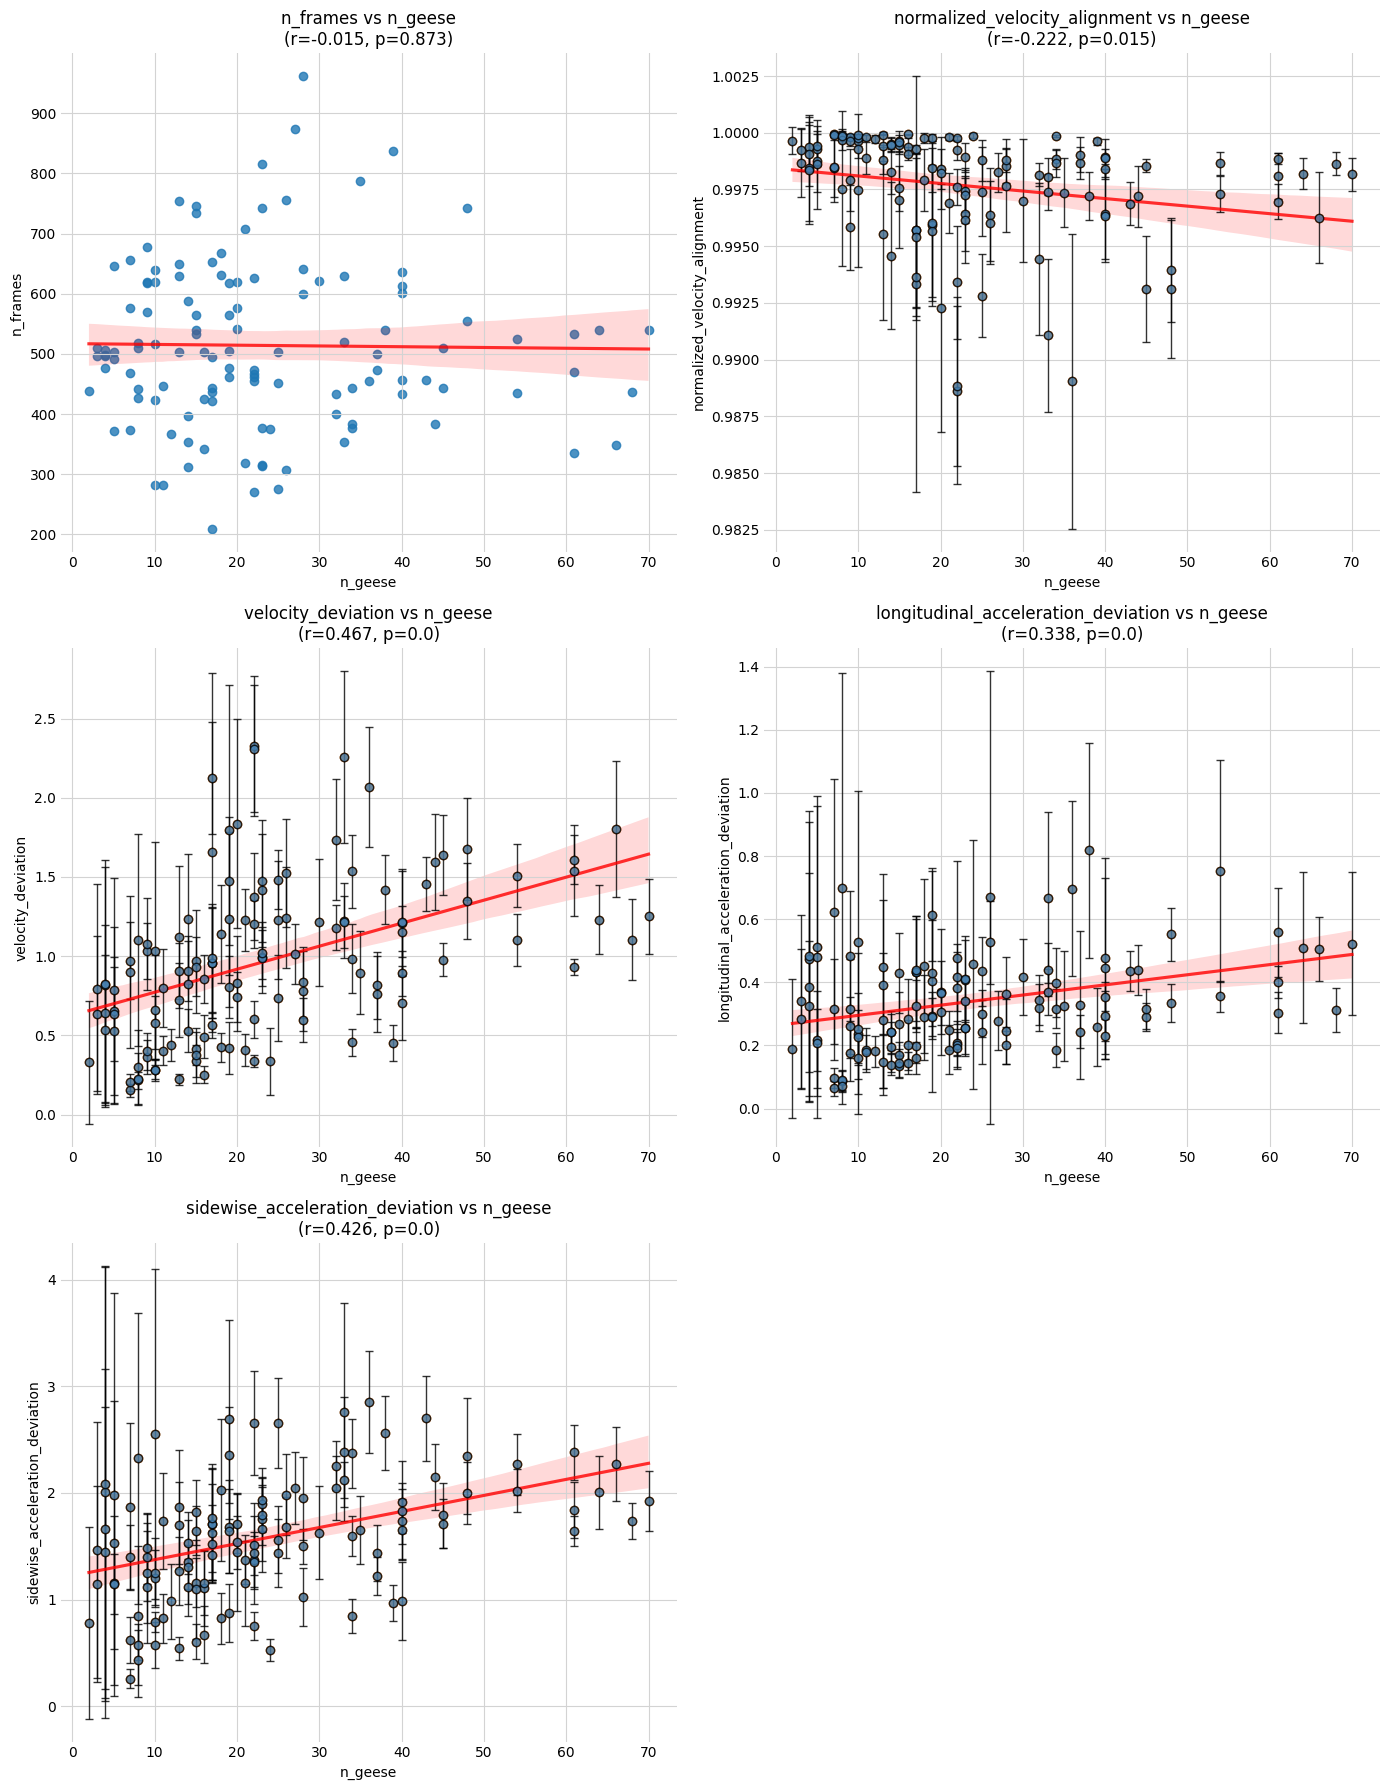

In [66]:
show_correlations(df, 'n_geese', features)